## E-tivity 1 - Data Preprocessing and Training a Machine Learning Model

Student Name: John

Student Surname: Hartigan

Student ID: 18228046

Date of Final Submission: 16/10/2022

## Step 1: Determing ML Model

The target of this e-tivity is to build a machine learning model that will predict the future Bond Price. I've chosen to build a supervised linear regression model as the target requires a prediction of a continous value. This model will give a predicted value O based on an input value P. Plotting these points on a graph gives a good visualisation of the data which helps in intepreting it. The linear regression equation in it's simplest form is P = O*x + c, with b representing the slope of the line and c the intercept.


In [33]:
import pandas as pd

url_dataset = "https://raw.githubusercontent.com/evassev/CS6501_SEM2_2022/main/Etivities/data/trade_combined.csv"
df = pd.read_csv(url_dataset)

df.head(10)

,NoRelatedSym,Symbol,SymbolSfx,SecurityID,SecurityIDSource,SecurityType,MaturityDate,IssueDate,Side,OrderQty,...,NoPartIDs,PartyID,DealerID,DealerTraderID,CustomerTraderID,CustomerID,PartyIDSource,PartyRole,DealerCount,OrdSubType
0,1,135087L93,WI,NaN,1,BOND,9/1/2026,4/16/2021 0:00,BUY,2400000,...,1,1,334,10792.0,6549,129,D,13,5,OUTRIGHT
1,1,135087L93,WI,NaN,1,BOND,9/1/2026,4/16/2021 0:00,BUY,2400000,...,1,1,335,117793.0,6549,129,D,13,5,OUTRIGHT
2,1,135087L93,WI,NaN,1,BOND,9/1/2026,4/16/2021 0:00,BUY,2400000,...,1,1,325,119290.0,6549,129,D,13,5,OUTRIGHT
3,1,135087L93,WI,NaN,1,BOND,9/1/2026,4/16/2021 0:00,BUY,2400000,...,1,1,327,113852.0,6549,129,D,13,5,OUTRIGHT
4,1,135087L93,WI,NaN,1,BOND,9/1/2026,4/16/2021 0:00,BUY,2400000,...,1,1,337,117795.0,6549,129,D,13,5,OUTRIGHT
5,1,135087M76,WI,NaN,1,BOND,11/1/2023,8/9/2021 0:00,SELL,15000000,...,1,1,325,119752.0,7019,277,D,13,4,OUTRIGHT
6,1,135087M76,WI,NaN,1,BOND,11/1/2023,8/9/2021 0:00,SELL,15000000,...,1,1,336,117794.0,7019,277,D,13,4,OUTRIGHT
7,1,135087M76,WI,NaN,1,BOND,11/1/2023,8/9/2021 0:00,SELL,15000000,...,1,1,323,117786.0,7019,277,D,13,4,OUTRIGHT
8,1,135087M76,WI,NaN,1,BOND,11/1/2023,8/9/2021 0:00,SELL,15000000,...,1,1,337,117795.0,7019,277,D,13,4,OUTRIGHT
9,1,135087L93,WI,NaN,1,BOND,9/1/2026,4/16/2021 0:00,SELL,600000,...,1,1,335,117793.0,11532,177,D,13,4,OUTRIGHT


## Step 2.1: Specifics of the dataset

In [2]:
df.shape

(20000, 27)

In [3]:
df.columns

Index(['NoRelatedSym', 'Symbol', 'SymbolSfx', 'SecurityID', 'SecurityIDSource',
       'SecurityType', 'MaturityDate', 'IssueDate', 'Side', 'OrderQty',
       'SettlDate', 'Currency', 'OrdType', 'TransactTime', 'Price',
       'PriceType', 'Yield', 'NoPartIDs', 'PartyID', 'DealerID',
       'DealerTraderID', 'CustomerTraderID', 'CustomerID', 'PartyIDSource',
       'PartyRole', 'DealerCount', 'OrdSubType'],
      dtype='object')

In [4]:
df.dtypes

NoRelatedSym          int64
Symbol               object
SymbolSfx            object
SecurityID          float64
SecurityIDSource      int64
SecurityType         object
MaturityDate         object
IssueDate            object
Side                 object
OrderQty              int64
SettlDate            object
Currency             object
OrdType               int64
TransactTime         object
Price               float64
PriceType             int64
Yield               float64
NoPartIDs             int64
PartyID               int64
DealerID              int64
DealerTraderID      float64
CustomerTraderID      int64
CustomerID            int64
PartyIDSource        object
PartyRole             int64
DealerCount           int64
OrdSubType           object
dtype: object

In [5]:
Price = df["Price"]

In [17]:
df.describe().Price

count    18692.000000
mean       107.535666
std         14.445474
min          0.000000
25%         99.749750
50%        103.324500
75%        110.360500
max        174.278000
Name: Price, dtype: float64

In [22]:
df['Price'].value_counts()

0.000      37
98.600     28
99.770     24
98.610     19
98.620     18
           ..
121.649     1
155.661     1
124.094     1
148.223     1
109.099     1
Name: Price, Length: 12112, dtype: int64

In [27]:
from scipy import stats

In [32]:
import matplotlib.pyplot as plt

In [10]:
import numpy as np
import pandas as pd

<AxesSubplot:ylabel='Frequency'>

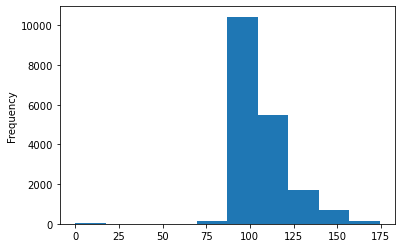

In [4]:
df['Price'].plot.hist()

<AxesSubplot:ylabel='Density'>

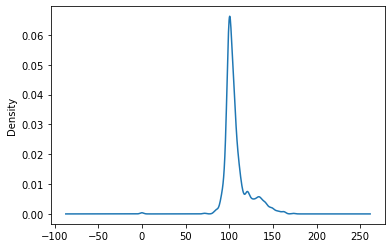

In [5]:
df['Price'].plot.density()

<AxesSubplot:>

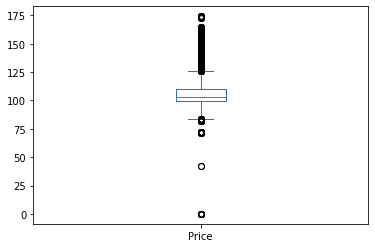

In [6]:
df['Price'].plot.box()

## Step 2.2: Data Cleaning: Remove features with unique values for each row in the dataset

Unique values add no value to buiding a ML algorithim for prediction so when cleaning your dataset it is best to remove these values.

In [34]:
for column in df.columns:
    counter=df[column].count()
    uniquevalue=len(df[column].unique())
    print('In', column, ' there are ',uniquevalue,' out of ',counter)
    

In NoRelatedSym  there are  1  out of  20000
In Symbol  there are  411  out of  20000
In SymbolSfx  there are  1  out of  20000
In SecurityID  there are  1913  out of  6041
In SecurityIDSource  there are  1  out of  20000
In SecurityType  there are  4  out of  20000
In MaturityDate  there are  311  out of  20000
In IssueDate  there are  402  out of  20000
In Side  there are  2  out of  20000
In OrderQty  there are  1249  out of  20000
In SettlDate  there are  99  out of  20000
In Currency  there are  1  out of  20000
In OrdType  there are  1  out of  20000
In TransactTime  there are  4130  out of  20000
In Price  there are  12113  out of  18692
In PriceType  there are  1  out of  20000
In Yield  there are  3288  out of  18703
In NoPartIDs  there are  1  out of  20000
In PartyID  there are  1  out of  20000
In DealerID  there are  14  out of  20000
In DealerTraderID  there are  161  out of  18945
In CustomerTraderID  there are  389  out of  20000
In CustomerID  there are  170  out of  2

In [8]:
df['NoRelatedSym']

0        1
1        1
2        1
3        1
4        1
        ..
19995    1
19996    1
19997    1
19998    1
19999    1
Name: NoRelatedSym, Length: 20000, dtype: int64

## Step 2.3: Data Cleaning: Remove features with one unique value for the entire dataset.


In [35]:
removedcolumns=0
for column in df.columns:
    uniquevalues=len(df[column].unique())
    
    if(uniquevalues==1):
        df.drop(column, axis=1, inplace=True)
        print(column, 'has been removed')
        removedcolumns=removedcolumns+1
if removedcolumns==0:
    print('no columns were removed')

NoRelatedSym has been removed
SymbolSfx has been removed
SecurityIDSource has been removed
Currency has been removed
OrdType has been removed
PriceType has been removed
NoPartIDs has been removed
PartyID has been removed
PartyIDSource has been removed
PartyRole has been removed
OrdSubType has been removed


In [36]:
removedcolumns

11

## Step 2.4: Data Cleaning: Remove records with null (NAN) values
Null values are used where you want to indicate that you could have a value but are unsure of what it should be. They serve as placeholders while you gather the information required to actually populate the table field with a genuine value. Never mistake NULL values for zeros or empty strings. It is best to remove these values before training the ML algorithim.

In [37]:
for column in df.columns:
    numnulls=df[column].isnull().sum()
    print('In ', column, 'there are ', numnulls, 'nulls')

In  Symbol there are  0 nulls
In  SecurityID there are  13959 nulls
In  SecurityType there are  0 nulls
In  MaturityDate there are  0 nulls
In  IssueDate there are  0 nulls
In  Side there are  0 nulls
In  OrderQty there are  0 nulls
In  SettlDate there are  0 nulls
In  TransactTime there are  0 nulls
In  Price there are  1308 nulls
In  Yield there are  1297 nulls
In  DealerID there are  0 nulls
In  DealerTraderID there are  1055 nulls
In  CustomerTraderID there are  0 nulls
In  CustomerID there are  0 nulls
In  DealerCount there are  0 nulls


In [38]:
df

,Symbol,SecurityID,SecurityType,MaturityDate,IssueDate,Side,OrderQty,SettlDate,TransactTime,Price,Yield,DealerID,DealerTraderID,CustomerTraderID,CustomerID,DealerCount
0,135087L93,NaN,BOND,9/1/2026,4/16/2021 0:00,BUY,2400000,12/16/2021,15:20:43,NaN,NaN,334,10792.0,6549,129,5
1,135087L93,NaN,BOND,9/1/2026,4/16/2021 0:00,BUY,2400000,12/16/2021,15:20:43,98.720,1.281,335,117793.0,6549,129,5
2,135087L93,NaN,BOND,9/1/2026,4/16/2021 0:00,BUY,2400000,12/16/2021,15:20:43,98.720,1.281,325,119290.0,6549,129,5
3,135087L93,NaN,BOND,9/1/2026,4/16/2021 0:00,BUY,2400000,12/16/2021,15:20:43,98.711,1.283,327,113852.0,6549,129,5
4,135087L93,NaN,BOND,9/1/2026,4/16/2021 0:00,BUY,2400000,12/16/2021,15:20:43,98.699,1.286,337,117795.0,6549,129,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,135087A38,147039.0,GOC,8/1/2015,4/26/2013 0:00,SELL,12000000,6/24/2013,14:51:56,100.651,1.186,334,10792.0,7025,280,4
19996,135087A38,147038.0,GOC,8/1/2015,4/26/2013 0:00,BUY,50000000,6/24/2013,14:51:53,100.653,1.185,334,10792.0,6753,204,1
19997,013051CZ8,147033.0,PROV,12/1/2019,9/28/2009 0:00,SELL,700000,6/25/2013,14:50:59,109.000,2.478,332,10567.0,7053,292,4
19998,135087A38,147039.0,GOC,8/1/2015,4/26/2013 0:00,SELL,12000000,6/24/2013,14:51:56,100.645,1.189,330,9970.0,7025,280,4


In [41]:
nonull_df=df[df['SecurityID'].notna()]
nonull_df.count()

Symbol              6041
SecurityID          6041
SecurityType        6041
MaturityDate        6041
IssueDate           6041
Side                6041
OrderQty            6041
SettlDate           6041
TransactTime        6041
Price               6040
Yield               6032
DealerID            6041
DealerTraderID      5685
CustomerTraderID    6041
CustomerID          6041
DealerCount         6041
dtype: int64

In [42]:
for column in nonull_df.columns:
    numnulls=nonull_df[column].isnull().sum()
    counting_total=nonull_df[column].count()
    print('In ', column, 'there are ', numnulls, 'nulls',' out of ',counting_total)

In  Symbol there are  0 nulls  out of  6041
In  SecurityID there are  0 nulls  out of  6041
In  SecurityType there are  0 nulls  out of  6041
In  MaturityDate there are  0 nulls  out of  6041
In  IssueDate there are  0 nulls  out of  6041
In  Side there are  0 nulls  out of  6041
In  OrderQty there are  0 nulls  out of  6041
In  SettlDate there are  0 nulls  out of  6041
In  TransactTime there are  0 nulls  out of  6041
In  Price there are  1 nulls  out of  6040
In  Yield there are  9 nulls  out of  6032
In  DealerID there are  0 nulls  out of  6041
In  DealerTraderID there are  356 nulls  out of  5685
In  CustomerTraderID there are  0 nulls  out of  6041
In  CustomerID there are  0 nulls  out of  6041
In  DealerCount there are  0 nulls  out of  6041


In [43]:
nonull_df2=nonull_df[nonull_df['DealerTraderID'].notna()]
nonull_df2.count()

Symbol              5685
SecurityID          5685
SecurityType        5685
MaturityDate        5685
IssueDate           5685
Side                5685
OrderQty            5685
SettlDate           5685
TransactTime        5685
Price               5685
Yield               5685
DealerID            5685
DealerTraderID      5685
CustomerTraderID    5685
CustomerID          5685
DealerCount         5685
dtype: int64

In [44]:
for column in nonull_df2.columns:
    numnulls=nonull_df2[column].isnull().sum()
    counting_total=nonull_df2[column].count()
    print('In ', column, 'there are ', numnulls, 'nulls',' out of ',counting_total)

In  Symbol there are  0 nulls  out of  5685
In  SecurityID there are  0 nulls  out of  5685
In  SecurityType there are  0 nulls  out of  5685
In  MaturityDate there are  0 nulls  out of  5685
In  IssueDate there are  0 nulls  out of  5685
In  Side there are  0 nulls  out of  5685
In  OrderQty there are  0 nulls  out of  5685
In  SettlDate there are  0 nulls  out of  5685
In  TransactTime there are  0 nulls  out of  5685
In  Price there are  0 nulls  out of  5685
In  Yield there are  0 nulls  out of  5685
In  DealerID there are  0 nulls  out of  5685
In  DealerTraderID there are  0 nulls  out of  5685
In  CustomerTraderID there are  0 nulls  out of  5685
In  CustomerID there are  0 nulls  out of  5685
In  DealerCount there are  0 nulls  out of  5685


## Step 2.5: Data Transformation: Convert all non-numeric features to numeric.
All non-nummeric values must be changed into numeric values in order for the ML algorithim to work as it will only recognise numeric data. 

In [45]:
nonull_df2.dtypes

Symbol               object
SecurityID          float64
SecurityType         object
MaturityDate         object
IssueDate            object
Side                 object
OrderQty              int64
SettlDate            object
TransactTime         object
Price               float64
Yield               float64
DealerID              int64
DealerTraderID      float64
CustomerTraderID      int64
CustomerID            int64
DealerCount           int64
dtype: object

In [46]:
nonnumbers=nonull_df2.select_dtypes(exclude=np.number).columns.tolist()
nonnumbers

['Symbol',
 'SecurityType',
 'MaturityDate',
 'IssueDate',
 'Side',
 'SettlDate',
 'TransactTime']

In [47]:
df2=nonull_df2

df2['MaturityDate']=pd.to_datetime(df2['MaturityDate']).dt.strftime("%Y%m%d").astype(int)
df2['IssueDate']=pd.to_datetime(df2['IssueDate']).dt.strftime("%Y%m%d").astype(int)
df2['SettlDate']=pd.to_datetime(df2['SettlDate']).dt.strftime("%Y%m%d").astype(int)
df2['TransactTime']=pd.to_datetime(df2['TransactTime']).dt.strftime("%Y%m%d").astype(int)
df2


C:\Users\Admin\AppData\Local\Temp\ipykernel_14620\3423885166.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['MaturityDate']=pd.to_datetime(df2['MaturityDate']).dt.strftime("%Y%m%d").astype(int)
C:\Users\Admin\AppData\Local\Temp\ipykernel_14620\3423885166.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['IssueDate']=pd.to_datetime(df2['IssueDate']).dt.strftime("%Y%m%d").astype(int)
C:\Users\Admin\AppData\Local\Temp\ipykernel_14620\3423885166.py:5: SettingWithCopyWarning: 
A value is trying to

,Symbol,SecurityID,SecurityType,MaturityDate,IssueDate,Side,OrderQty,SettlDate,TransactTime,Price,Yield,DealerID,DealerTraderID,CustomerTraderID,CustomerID,DealerCount
6204,135087D35,1657312.0,GOC,20481201,20140602,BUY,1000000,20180620,20221013,111.140,2.243,334,113683.0,11570,454,4
6205,135087D35,1657312.0,GOC,20481201,20140602,BUY,1000000,20180620,20221013,111.220,2.240,335,114347.0,11570,454,4
6206,135087H80,1657313.0,GOC,20200501,20180209,SELL,5000000,20180620,20221013,99.760,1.881,323,118599.0,6753,204,1
6207,135087D35,1657317.0,GOC,20481201,20140602,BUY,1250000,20180620,20221013,111.198,2.241,321,7177.0,6687,178,4
6208,135087D35,1657317.0,GOC,20481201,20140602,BUY,1250000,20180620,20221013,111.130,2.244,327,7687.0,6687,178,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,135087A38,147039.0,GOC,20150801,20130426,SELL,12000000,20130624,20221013,100.651,1.186,334,10792.0,7025,280,4
19996,135087A38,147038.0,GOC,20150801,20130426,BUY,50000000,20130624,20221013,100.653,1.185,334,10792.0,6753,204,1
19997,013051CZ8,147033.0,PROV,20191201,20090928,SELL,700000,20130625,20221013,109.000,2.478,332,10567.0,7053,292,4
19998,135087A38,147039.0,GOC,20150801,20130426,SELL,12000000,20130624,20221013,100.645,1.189,330,9970.0,7025,280,4


In [48]:
values=df2['Symbol'].unique()
mapper={}
counter=0
for x in values:
    counter=counter+1
    mapper[x]=counter
df2['Symbol']=df2['Symbol'].replace(mapper)
df2['Symbol']

C:\Users\Admin\AppData\Local\Temp\ipykernel_14620\1108028688.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Symbol']=df2['Symbol'].replace(mapper)


6204       1
6205       1
6206       2
6207       1
6208       1
        ... 
19995    150
19996    150
19997    304
19998    150
19999    304
Name: Symbol, Length: 5685, dtype: int64

In [51]:
for column in df2.columns:
    counter=df2[column].count()
    uniquevalue=len(df2[column].unique())
    print('In', column, ' there are ',uniquevalue,' out of ',counter)

In Symbol  there are  304  out of  5685
In SecurityID  there are  1883  out of  5685
In SecurityType  there are  3  out of  5685
In MaturityDate  there are  245  out of  5685
In IssueDate  there are  301  out of  5685
In Side  there are  2  out of  5685
In OrderQty  there are  504  out of  5685
In SettlDate  there are  46  out of  5685
In TransactTime  there are  1  out of  5685
In Price  there are  4225  out of  5685
In Yield  there are  2178  out of  5685
In DealerID  there are  14  out of  5685
In DealerTraderID  there are  131  out of  5685
In CustomerTraderID  there are  251  out of  5685
In CustomerID  there are  135  out of  5685
In DealerCount  there are  5  out of  5685


In [52]:
df2['SecurityType'].unique()

array(['GOC', 'PROV', 'CMB'], dtype=object)

In [53]:
mapper={'GOC': 5, 'PROV': 6, 'CMB': 7}
df2['SecurityType']=df2['SecurityType'].replace(mapper)
df2['SecurityType']

C:\Users\Admin\AppData\Local\Temp\ipykernel_14620\3005168377.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['SecurityType']=df2['SecurityType'].replace(mapper)


6204     5
6205     5
6206     5
6207     5
6208     5
        ..
19995    5
19996    5
19997    6
19998    5
19999    6
Name: SecurityType, Length: 5685, dtype: int64

In [54]:
df2['Side'].unique()

array(['BUY', 'SELL'], dtype=object)

In [55]:
mapper={'BUY': 8, 'SELL': 9}
df2['Side']=df2['Side'].replace(mapper)
df2['Side']

C:\Users\Admin\AppData\Local\Temp\ipykernel_14620\1371882689.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Side']=df2['Side'].replace(mapper)


6204     8
6205     8
6206     9
6207     8
6208     8
        ..
19995    9
19996    8
19997    9
19998    9
19999    9
Name: Side, Length: 5685, dtype: int64

In [56]:
nonnumbers1=df2.select_dtypes(exclude=np.number).columns.tolist()
nonnumbers1

[]

## Step 3: Model Training and Testing

The trainting split the df is split into 80% for training and 20% for testing. The training data will be compared against the testing data to make an estimation on the acccuracy of the ML model.

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelBinarizer

P=df2.loc[:,df2.columns=='Price']
O=df2.loc[:,df2.columns!='Price']

O_train, O_test, P_train, P_test=train_test_split(O,P,test_size=0.2,random_state=0)




In [1]:
from sklearn.cluster import KMeans 

In [60]:
regressor=RandomForestRegressor(n_estimators=100)
regressor.fit(O_train,P_train)

C:\Users\Admin\AppData\Local\Temp\ipykernel_14620\1127778916.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(O_train,P_train)


RandomForestRegressor()

In [61]:
P_predict=regressor.predict(O_test)
P_predict

array([100.40053, 131.64156, 111.04353, ..., 103.47025, 136.05894,
       114.4202 ])

In [62]:
from sklearn import metrics
print(metrics.r2_score(P_test,P_predict))

0.996182632793788


## Conclusion

With a prediction score of .996 we can say the model is very well suited and will give very good predictions based on the regression equation built by the machine learning model. Some might claim the model is bias based on how close the score is to 1 but as the machine algorithim is random in it's train/test split this claim is not true. 